In [9]:
#importing the required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [10]:
wonder=pd.read_csv('C:\\6\\Wonders of World\\wonders_of_world_images.csv', header=None)
image_arrays=wonder.to_numpy()
len(image_arrays)
print(wonder.info())
print(wonder.shape)
print(wonder.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1467 non-null   object
 1   1       1467 non-null   object
dtypes: object(2)
memory usage: 23.0+ KB
None
(1467, 2)
Int64Index([0, 1], dtype='int64')


In [11]:
X = wonder.drop([0], axis=1)
y = wonder[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape)
print(y_train.shape)

(1173, 1)
(1173,)


In [12]:
tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\6\\Wonders of World\\Wonders of World",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1467 files belonging to 5 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
batch_size = 32
img_height = 180
img_width = 180

In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "C:\\6\\Wonders of World\\Wonders of World",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1467 files belonging to 5 classes.
Using 1174 files for training.


In [15]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "C:\\6\\Wonders of World\\Wonders of World",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1467 files belonging to 5 classes.
Using 293 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)

['chichen_itza', 'machu_pichu', 'pyramids_of_giza', 'stonehenge', 'taj_mahal']


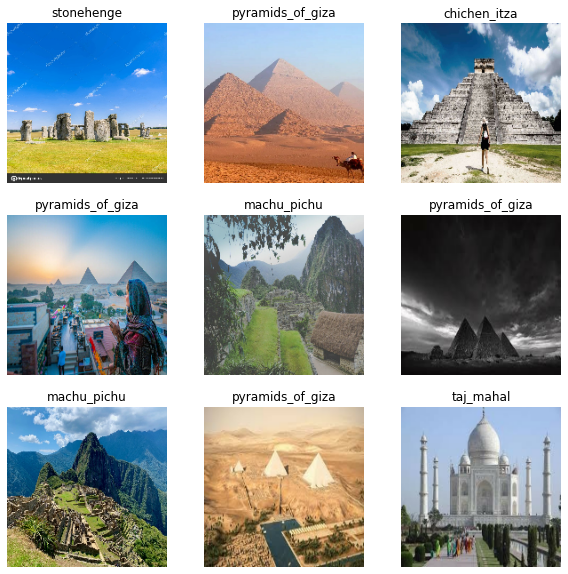

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [22]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(180,180,3)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
model.fit(train_ds,epochs=10)

Epoch 1/10
37/37 [==============================] - 34s 871ms/step - loss: 2266.9236 - accuracy: 0.3995
Epoch 2/10
37/37 [==============================] - 31s 804ms/step - loss: 30.8790 - accuracy: 0.6593
Epoch 3/10
37/37 [==============================] - 30s 779ms/step - loss: 2.5506 - accuracy: 0.9080
Epoch 4/10
37/37 [==============================] - 30s 778ms/step - loss: 0.9610 - accuracy: 0.9497
Epoch 5/10
37/37 [==============================] - 30s 791ms/step - loss: 0.1835 - accuracy: 0.9838
Epoch 6/10
37/37 [==============================] - 30s 785ms/step - loss: 0.1205 - accuracy: 0.9855
Epoch 7/10
37/37 [==============================] - 32s 856ms/step - loss: 0.0406 - accuracy: 0.9940
Epoch 8/10
37/37 [==============================] - 32s 831ms/step - loss: 0.0210 - accuracy: 0.9957
Epoch 9/10
37/37 [==============================] - 30s 787ms/step - loss: 4.1001e-04 - accuracy: 1.0000
Epoch 10/10
37/37 [==============================] - 30s 801ms/step - loss: 1.0011e

In [23]:
#evaluting the model
model.evaluate(val_ds)

10/10 [==============================] - 3s 141ms/step - loss: 12.1264 - accuracy: 0.8396


[12.12636947631836, 0.8395904302597046]